Нормальне відхилення.


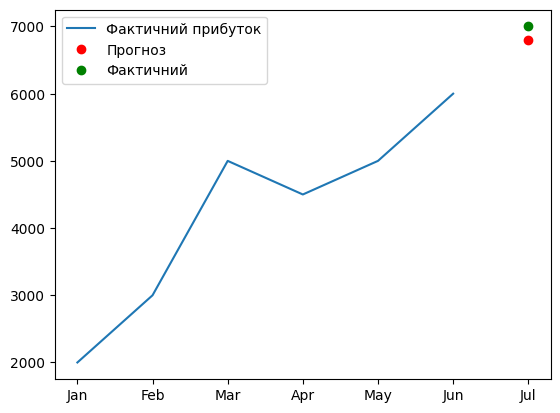

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv('financial_data.csv')

# Розрахунок прибутку
df['profit'] = df['revenue'] - df['expenses']

# Прогнозування прибутку
X = np.array(range(len(df))).reshape(-1, 1)
y = df['profit'].values
model = LinearRegression()
model.fit(X, y)
next_month = len(df)
forecast_profit = model.predict([[next_month]])[0]

# Фактичний прибуток
actual_profit = 7000

# Розрахунок DELTA
DELTA = actual_profit - forecast_profit

# Автокорекція
threshold = 1000
if abs(DELTA) > threshold:
    print("Значне відхилення!")
    if DELTA < 0:
        print("Рекомендація: скоротити витрати.")
    else:
        print("Рекомендація: інвестувати.")
else:
    print("Нормальне відхилення.")

# Візуалізація
plt.plot(df['month'], df['profit'], label='Фактичний прибуток')
plt.plot(['Jul'], [forecast_profit], 'ro', label='Прогноз')
plt.plot(['Jul'], [actual_profit], 'go', label='Фактичний')
plt.legend()
plt.savefig('profit_analysis.png')